In [1]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scratchdiff.Unit as sd
from scratchdiff.Unit import Unit

In [3]:
def fetch_mnist():
  import gzip
  parse = lambda file: np.frombuffer(gzip.open(file).read(), dtype=np.uint8).copy()
  X_train = parse("mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28*28)).astype(np.float32)
  Y_train = parse("mnist/train-labels-idx1-ubyte.gz")[8:]
  X_test = parse("mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28*28)).astype(np.float32)
  Y_test = parse("mnist/t10k-labels-idx1-ubyte.gz")[8:]
  return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = fetch_mnist()

(<matplotlib.image.AxesImage at 0x7f53b1ee8580>, 5)

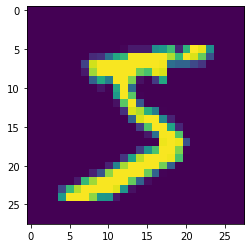

In [4]:
plt.imshow(X_train[0].reshape((28,28))) , Y_train[0]

In [5]:
# 2 linear layers, one relu and finally logsoftmax
BS = 28
vec_dim = X_train.shape[-1] # 784
W1 = Unit(np.random.randn(vec_dim, 16)* np.sqrt(2/vec_dim))
B1 = Unit(np.random.randn(BS, 16)* np.sqrt(2/BS))
W2 = Unit(np.random.randn(16, 16)* np.sqrt(2/16))
B2 = Unit(np.random.randn(BS, 16)* np.sqrt(2/BS))
W3 = Unit(np.random.randn(16, 10)* np.sqrt(2/16))
B3 = Unit(np.random.randn(BS, 10)* np.sqrt(2/BS))


In [7]:
def linear(w,b, x):
    return sd.add(sd.matmul(x,w), b)

# def logsoftmax(t):
#     c = np.max(t.data, axis=1).reshape(-1,1)
#     m = sd.add(t, -c)
#     lexpsum = sd.log(sd.sum(sd.exp(m), axis=1))
#     itm = sd.add(t,-c)
#     out = sd.add(itm, -lexpsum.data)
#     return out

t = Unit([[1,2,3], [2,3,1]])
c = np.max(t.data, axis=1).reshape(-1,1)
m = sd.add(t, Unit(-c, requires_grad=False))
lexpsum = sd.log(sd.sum(sd.exp(m), axis=1))
out = sd.add(m, sd.neg(lexpsum) )
# y = logsoftmax(x)
z  = sd.sum(out, keepdims=False)
print(out)
z.backward_pass()
lexpsum.grad

<Unit array([[-2.4076061, -1.407606 , -0.407606 ],
       [-1.407606 , -0.407606 , -2.4076061]], dtype=float32) with grad array([[0., 0., 0.],
       [0., 0., 0.]]) and grad_fn="_add_Backward">


AttributeError: not enough data for array

In [ ]:
x = sd.neg(np.array([[1,2],[3,4]]))
x
# y = sd.sum(x, keepdims=False)
# y

In [ ]:
(-np.max(Unit([[1,2,3], [2,3,1]]).data, axis=1)).reshape(-1,1)

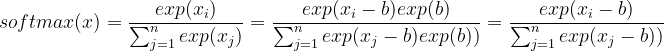
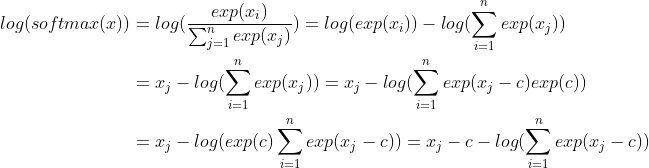

In [ ]:
for epoch in range(10):
    for i in range(0, X_train.shape[0],BS):
        W1.zero_grad()
        B1.zero_grad()
        W2.zero_grad()
        B2.zero_grad()
        W3.zero_grad()
        B3.zero_grad()
        print(i)
        l1 = linear(W1, B1, X_train[i:i+BS])
        l1 = sd.relu(l1)
        l2 = linear(W2, B2, l1)
        l2 = sd.relu(l2)
        l3 = linear(W3, B3, l2)
        l3 = sd.add(l3, -np.amax(l3.data, axis=1).reshape((28,1)))
        l3 = sd.logsoftmax(l3)
        yhat = sd.crossentropy(l3, Y_train[i:i+BS].reshape((28,1)))
        yhat.backward_pass()
        W1.data -= 0.001*W1.grad.data
        B1.data -= 0.001*B1.grad.data
        W2.data -= 0.001*W2.grad.data
        B2.data -= 0.001*B2.grad.data
        W3.data -= 0.001*W3.grad.data
        B3.data -= 0.001*B3.grad.data
    
    y_t = 
    break
        

In [ ]:
relu([1, -1, 23])

In [ ]:
X_train[0:32].shape

In [ ]:
matmul(X_train[i:i+32], W1)

In [ ]:
sd.add(2,-1)